## Circles

### Set1


In [65]:
import numpy as np

# 初始化参数
R_inner = 1.0  # 内圆半径
R_outer = 7.5  # 外圆半径
n_xi = 100     # xi方向的网格数
n_eta = 50     # eta方向的网格数
epsilon = 1e-4   # 收敛条件

# 创建xi和eta的网格点
xi = np.linspace(0, 2*np.pi, n_xi)
eta = np.linspace(0, 1, n_eta)

# 初始化x和y的网格
x = np.zeros((n_xi, n_eta))
y = np.zeros((n_xi, n_eta))

# 使用初始网格生成
for i in range(n_xi):
    for j in range(n_eta):
        r = R_inner + (R_outer - R_inner) * (eta[j])
        x[i, j] = r * np.cos(xi[i])
        y[i, j] = r * np.sin(xi[i])
        
        

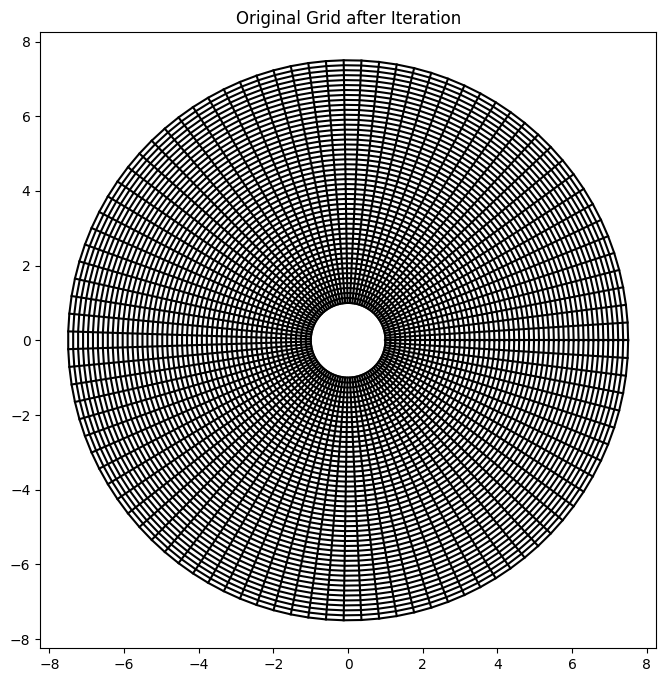

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
for i in range(n_xi):
    plt.plot(x[i, :], y[i, :], 'k')
for j in range(n_eta):
    plt.plot(x[:, j], y[:, j], 'k')
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Original Grid after Iteration')
plt.savefig('Circle_original.png')
plt.show()

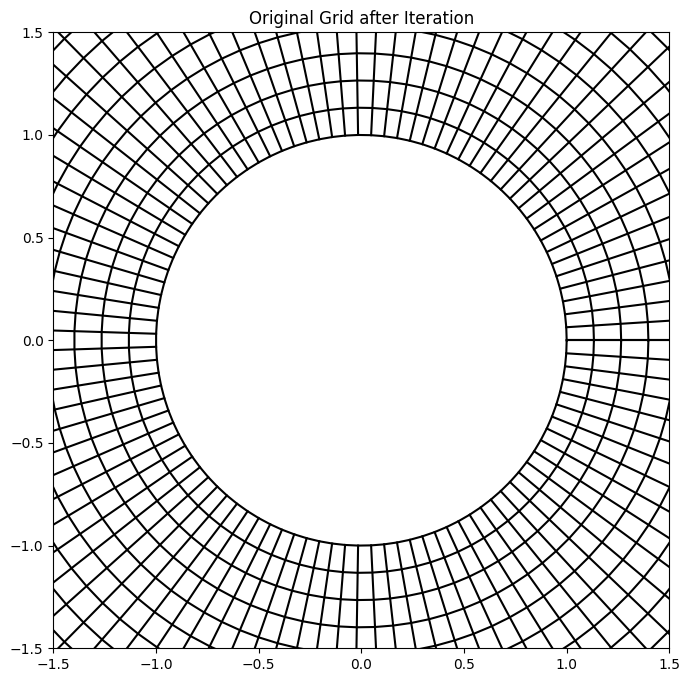

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
for i in range(n_xi):
    plt.plot(x[i, :], y[i, :], 'k')
for j in range(n_eta):
    plt.plot(x[:, j], y[:, j], 'k')
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Original Grid after Iteration')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.savefig('Circle_original_detailed.png')
plt.show()

In [62]:
# 设置迭代次数
max_iterations = 1000

for iteration in range(max_iterations):  # 最大迭代次数
    x_new = x.copy()
    y_new = y.copy()
    
    for i in range(1, n_xi):
        for j in range(1, n_eta-1):
            # 处理周期边界条件
            ip1 = (i + 1) % (n_xi-1)
            im1 = (i - 1) % (n_xi-1)    
            
            # 计算中心差分导数
            x_xi = (x[ip1, j] - x[im1, j]) / 2
            x_eta = (x[i, j+1] - x[i, j-1]) / 2
            y_xi = (y[ip1, j] - y[im1, j]) / 2
            y_eta = (y[i, j+1] - y[i, j-1]) / 2

            # 计算二阶导数
            x_xi_xi = x[ip1, j] - 2*x[i, j] + x[im1, j]
            x_eta_eta = 0.5*(-7*x[i, j-1] + 8*x[i, j] - x[i, j+1])-3*x_eta
            y_xi_xi = y[ip1, j] - 2*y[i, j] + y[im1, j]
            y_eta_eta = 0.5*(-7*y[i, j-1] + 8*y[i, j] - y[i, j+1])-3*y_eta
            
            # 计算α, β, γ
            alpha = x_eta**2 + y_eta**2           
            beta = x_xi * x_eta + y_xi * y_eta
            gamma = x_xi**2 + y_xi**2
            #g
            g11 =alpha
            g12 = beta
            g22 = gamma
            
            # 计算中心差分的交叉项
            x_cross = (x[ip1, j+1] - x[ip1, j-1] - x[im1, j+1] + x[im1, j-1]) / 2
            y_cross = (y[ip1, j+1] - y[ip1, j-1] - y[im1, j+1] + y[im1, j-1]) / 2

            # 计算系数
            b_w = b_e = alpha
            b_s = b_n = gamma
            b_p = b_w + b_e + b_s + b_n
            c_px = - beta * x_cross
            c_py = - beta * y_cross
            P = -(x_xi*x_xi_xi + y_xi*y_xi_xi)/g11 - (x_xi*x_eta_eta + y_xi*y_eta_eta)/g22
            Q = -(x_eta*x_eta_eta + y_eta*y_eta_eta)/g22 - (x_eta*x_xi_xi + y_eta*y_xi_xi)/g11
            # 更新x和y的值
            x_new[i, j] = (b_w*x[im1, j] + b_e*x[ip1, j] + b_s*x[i, j-1] + b_n*x[i, j+1] + c_px) / b_p
            y_new[i, j] = (b_w*y[im1, j] + b_e*y[ip1, j] + b_s*y[i, j-1] + b_n*y[i, j+1] + c_py) / b_p      
    x_new[0, :] = x_new[-1, :]  # 周期边界条件
    y_new[0, :] = y_new[-1, :]  # 周期边界条件
    
    # 检查收敛条件
    max_change = max(np.max(np.abs(x_new - x)), np.max(np.abs(y_new - y)))
    print(max_change)
    if max_change < epsilon:
        print(f'Convergence achieved after {iteration+1} iterations.')
        break

    # 更新网格
    x, y = x_new, y_new

0.0021052395107963306
0.002102991385953601
0.0021007321775710075
0.0020984624337838653
0.002096182678055225
0.002094308811078527
0.002092513054981815
0.002090703555542195
0.002088880795753756
0.0020870447266858605
0.0020851939662507313
0.002083325101287503
0.0020814323216309383
0.002079507426906879
0.002077540133528455
0.002075518569701451
0.002073429851486175
0.002071260657677154
0.0020689977497019285
0.002066899197290528
0.002065172050269126
0.002063373790908596
0.002061496424403675
0.0020595323238024044
0.0020574743656918137
0.002055316031378762
0.002053051476653245
0.002050675574096328
0.0020481839322221695
0.002045572895629899
0.0020437014969774125
0.0020417907120893197
0.0020397896269845894
0.0020376956213716824
0.002035506489527439
0.0020332204316173552
0.0020308360403684667
0.0020283522841859636
0.0020257684876483495
0.0020230843102200247
0.0020211796227398438
0.0020192183214837733
0.0020171766333874075
0.0020150540348744528
0.002012850209335504
0.0020105650357429283
0.00200819

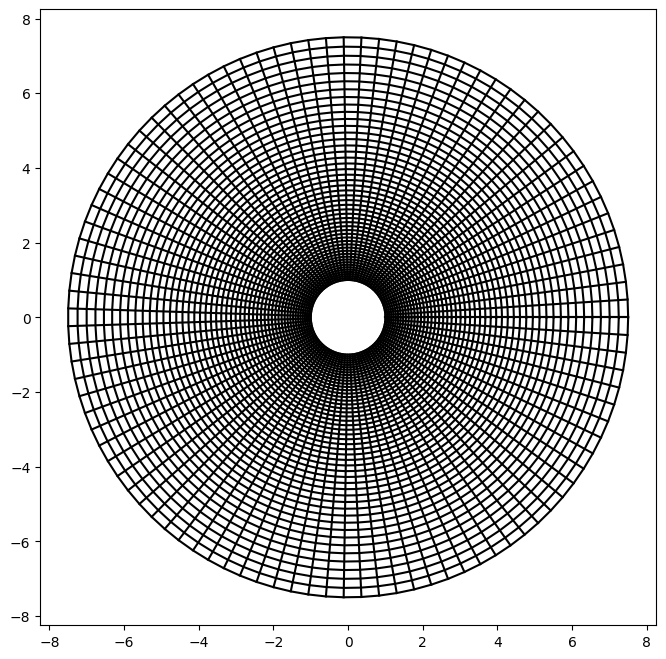

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
for i in range(n_xi):
    plt.plot(x[i, :], y[i, :], 'k')
for j in range(n_eta):
    plt.plot(x[:, j], y[:, j], 'k')
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig('Circle_no_source.png')
plt.show()

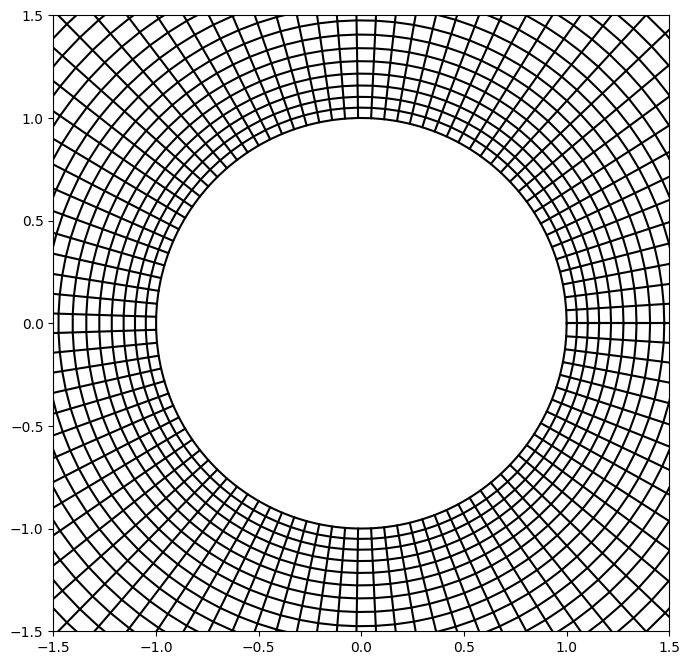

In [64]:
plt.figure(figsize=(8, 8))
for i in range(n_xi):
    plt.plot(x[i, :], y[i, :], 'k')
for j in range(n_eta):
    plt.plot(x[:, j], y[:, j], 'k')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig('Circle_no_source_detailed.png')
plt.show()

### Set 2


In [53]:
import numpy as np

# 初始化参数
R_inner = 1.0  # 内圆半径
R_outer = 7.5  # 外圆半径
n_xi = 100     # xi方向的网格数
n_eta = 50     # eta方向的网格数
epsilon = 1e-4   # 收敛条件

# 创建xi和eta的网格点
xi = np.linspace(0, 2*np.pi, n_xi)
eta = np.linspace(0, 1, n_eta)

# 初始化x和y的网格
x = np.zeros((n_xi, n_eta))
y = np.zeros((n_xi, n_eta))

# 使用初始网格生成
for i in range(n_xi):
    for j in range(n_eta):
        r = R_inner + (R_outer - R_inner) * (eta[j])
        x[i, j] = r * np.cos(xi[i])
        y[i, j] = r * np.sin(xi[i])
        
        

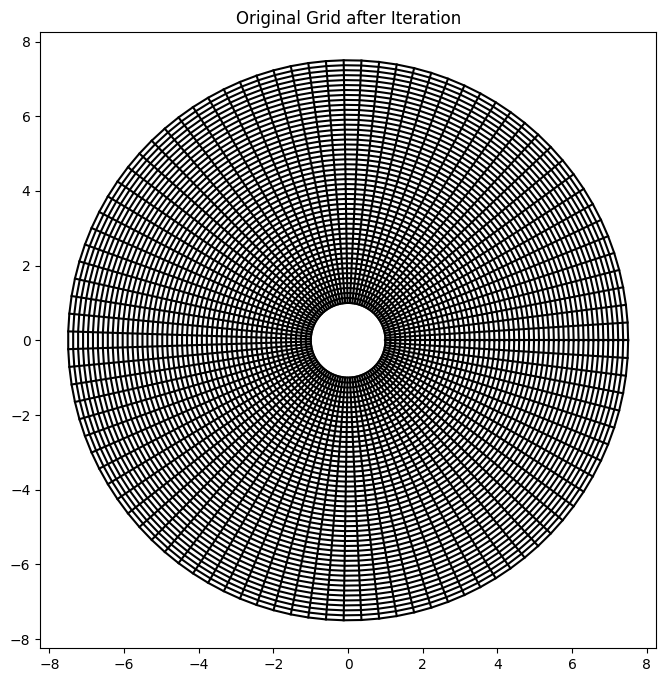

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
for i in range(n_xi):
    plt.plot(x[i, :], y[i, :], 'k')
for j in range(n_eta):
    plt.plot(x[:, j], y[:, j], 'k')
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Original Grid after Iteration')
plt.show()

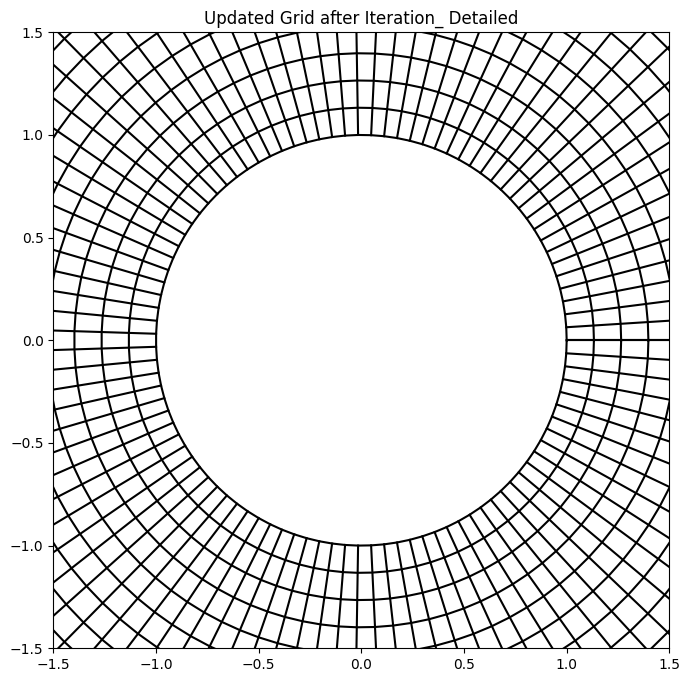

In [55]:
plt.figure(figsize=(8, 8))
for i in range(n_xi):
    plt.plot(x[i, :], y[i, :], 'k')
for j in range(n_eta):
    plt.plot(x[:, j], y[:, j], 'k')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Updated Grid after Iteration_ Detailed')
plt.show()

In [56]:
ds = 0.005  # 设置网格间距

P1_real = 0
Q1_real = 0
wp = 0.1
wq = 0.1
a = 20
b = 20

# 设置迭代次数
max_iterations = 500


for iteration in range(max_iterations):  # 最大迭代次数
    x_new = x.copy()
    y_new = y.copy()
    
    for i in range(1, n_xi):
        
        for j in range(0, n_eta-1):
            ip2 = (i + 2) % (n_xi-1)
            ip1 = (i + 1) % (n_xi-1)
            im1 = (i - 1) % (n_xi-1)
            im2 = (i - 2 + n_xi - 1) % (n_xi-1) 
            if(j == 0):
                # print('calculate P, Q')
                x_xi = (x[ip1, j] - x[im1, j]) / 2
                y_xi = (y[ip1, j] - y[im1, j]) / 2
                x_xi_plus = (x[ip2, j] - x[i, j]) / 2
                x_xi_minus = (x[i, j] - x[im2, j]) / 2
                y_xi_plus = (y[ip2, j] - y[i, j]) / 2
                y_xi_minus = (y[i, j] - y[im2, j]) / 2
                
                x_eta = ds*y_xi/(x_xi**2+y_xi**2)**0.5
                y_eta = -ds*x_xi/(x_xi**2+y_xi**2)**0.5
                
                x_eta_plus = ds*y_xi_plus/(x_xi_plus**2+y_xi_plus**2)**0.5
                y_eta_plus = -ds*x_xi_plus/(x_xi_plus**2+y_xi_plus**2)**0.5
                
                x_eta_minus = ds*y_xi_minus/(x_xi_minus**2+y_xi_minus**2)**0.5
                y_eta_minus = -ds*x_xi_minus/(x_xi_minus**2+y_xi_minus**2)**0.5
                
                x_xi_xi = x[ip1, j] - 2*x[i, j] + x[im1, j]
                x_eta_eta = 0.5*(-7*x[i, j-1] + 8*x[i, j] - x[i, j+1])-3*x_eta
                y_xi_xi = y[ip1, j] - 2*y[i, j] + y[im1, j]
                y_eta_eta = 0.5*(-7*y[i, j-1] + 8*y[i, j] - y[i, j+1])-3*y_eta
                
                alpha = x_eta**2 + y_eta**2
                beta = x_xi * x_eta + y_xi * y_eta
                gamma = x_xi**2 + y_xi**2
                
                x_xi_eta = (x_eta_plus - x_eta_minus)/2
                y_xi_eta = (y_eta_plus - y_eta_minus)/2
                
                J = x_xi*y_eta - x_eta*y_xi
                
                R1 = -J**-2*(alpha*x_xi_xi - 2*beta*x_xi_eta + gamma*x_eta_eta)
                R2 = -J**-2*(alpha*y_xi_xi - 2*beta*y_xi_eta + gamma*y_eta_eta)
                P1 = J**-1*(y_eta*R1 - x_eta*R2)
                Q1 = J**-1*(- y_xi*R1 + x_xi*R2)
                # if(P1_real == 0):
                #     P1_real = P1
                #     Q1_real = Q1
                # else:
                #     P1_real = P1_real + wp*(P1 - P1_real)
                #     Q1_real = Q1_real + wq*(Q1 - Q1_real)
                P1_real = P1_real + wp*(P1 - P1_real)
                Q1_real = Q1_real + wq*(Q1 - Q1_real)                         
            else:
                # 计算中心差分导数
                x_xi = (x[ip1, j] - x[im1, j]) / 2
                x_eta = (x[i, j+1] - x[i, j-1]) / 2
                y_xi = (y[ip1, j] - y[im1, j]) / 2
                y_eta = (y[i, j+1] - y[i, j-1]) / 2
                
                J = x_xi*y_eta - x_eta*y_xi
                
                # 计算α, β, γ
                alpha = x_eta**2 + y_eta**2           
                beta = x_xi * x_eta + y_xi * y_eta
                gamma = x_xi**2 + y_xi**2
                
                #g
                g11 = gamma
                g12 = beta
                g22 = alpha        
                    
                # 计算中心差分的交叉项
                x_cross = (x[ip1, j+1] - x[ip1, j-1] - x[im1, j+1] + x[im1, j-1]) / 2
                y_cross = (y[ip1, j+1] - y[ip1, j-1] - y[im1, j+1] + y[im1, j-1]) / 2

                # 计算系数
                b_w = b_e = alpha
                b_s = b_n = gamma
                b_p = b_w + b_e + b_s + b_n
                c_px = - beta * x_cross
                c_py = - beta * y_cross
                appendix_x = -J**2*(P1_real*np.exp(-a*j)*x_xi + Q1_real*np.exp(-a*j)*x_eta)
                appendix_y = -J**2*(P1_real*np.exp(-b*j)*y_xi + Q1_real*np.exp(-b*j)*y_eta)
                
                
                x_new[i, j] = (b_w*x[im1, j] + b_e*x[ip1, j] + b_s*x[i, j-1] + b_n*x[i, j+1] + c_px + appendix_x) / b_p
                y_new[i, j] = (b_w*y[im1, j] + b_e*y[ip1, j] + b_s*y[i, j-1] + b_n*y[i, j+1] + c_py + appendix_y) / b_p
                      
    x_new[0, :] = x_new[-1, :]  # 周期边界条件
    y_new[0, :] = y_new[-1, :]  # 周期边界条件
    
    # 检查收敛条件
    max_change = max(np.max(np.abs(x_new - x)), np.max(np.abs(y_new - y)))
    print(max_change)
    if max_change < epsilon:
        print(f'Convergence achieved after {iteration+1} iterations.')
        break
    # if max_change > 10 :
    #     print(f'Failed to converge after {iteration+1} iterations.')
    #     break
    # # 更新网格
    x, y = x_new, y_new

0.0021052395107963306
0.002102991385953601
0.0021007321775710075
0.0020984624337838653
0.002096182678055225
0.002094308811078527
0.002092513054981815
0.002090703555542639
0.0020888810643326927
0.0020870455418933176
0.002085198385112008
0.0020833322903879292
0.0020814536258928484
0.002079534505860625
0.0020776004485933974
0.0020755858606573696
0.0020735566433129904
0.0020713914417567203
0.0020692186609627683
0.002067002420681252
0.0020652766002031697
0.0020635421218644368
0.0020616604076266754
0.002059781101002578
0.0020577100127878722
0.002055657662293431
0.002053368415916079
0.002051119000925805
0.00204858887060011
0.002046123544829914
0.002044024632712471
0.002042087396419312
0.0020401899454260963
0.0020380591407520576
0.00203598700719132
0.0020336529269999737
0.0020313979658266312
0.0020288544141449094
0.0020264114387664733
0.0020236554381294347
0.0020215546109789706
0.002019697491637107
0.002017605100757436
0.0020155952433191793
0.0020133318326820415
0.0020111673048228695
0.0020087

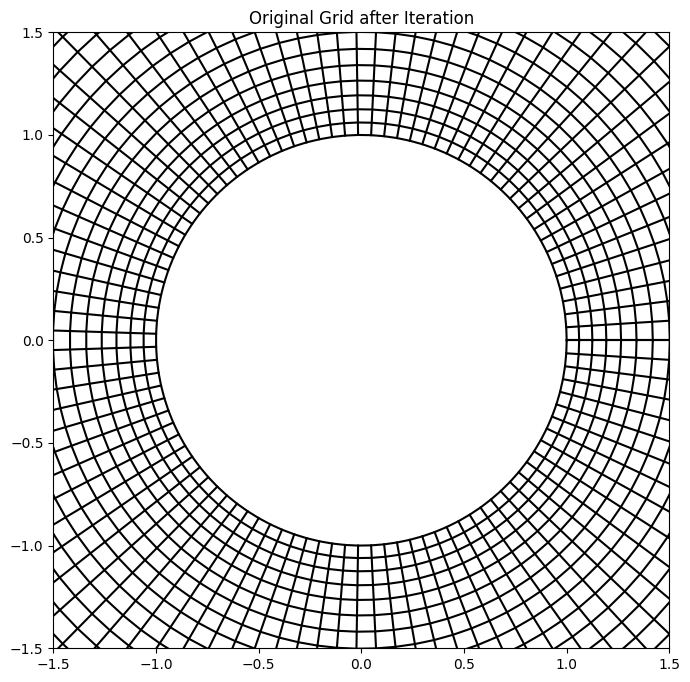

In [57]:
plt.figure(figsize=(8, 8))
for i in range(n_xi):
    plt.plot(x[i, :], y[i, :], 'k')
for j in range(n_eta):
    plt.plot(x[:, j], y[:, j], 'k')
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Original Grid after Iteration')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.savefig(f'Circle_source_ds_{ds}_detailed.png')
plt.show()

In [58]:
ds = 0.0005  # 设置网格间距

P1_real = 0
Q1_real = 0
wp = 0.1
wq = 0.1
a = 20
b = 20

# 设置迭代次数
max_iterations = 500


for iteration in range(max_iterations):  # 最大迭代次数
    x_new = x.copy()
    y_new = y.copy()
    
    for i in range(1, n_xi):
        
        for j in range(0, n_eta-1):
            ip2 = (i + 2) % (n_xi-1)
            ip1 = (i + 1) % (n_xi-1)
            im1 = (i - 1) % (n_xi-1)
            im2 = (i - 2 + n_xi - 1) % (n_xi-1) 
            if(j == 0):
                # print('calculate P, Q')
                x_xi = (x[ip1, j] - x[im1, j]) / 2
                y_xi = (y[ip1, j] - y[im1, j]) / 2
                x_xi_plus = (x[ip2, j] - x[i, j]) / 2
                x_xi_minus = (x[i, j] - x[im2, j]) / 2
                y_xi_plus = (y[ip2, j] - y[i, j]) / 2
                y_xi_minus = (y[i, j] - y[im2, j]) / 2
                
                x_eta = ds*y_xi/(x_xi**2+y_xi**2)**0.5
                y_eta = -ds*x_xi/(x_xi**2+y_xi**2)**0.5
                
                x_eta_plus = ds*y_xi_plus/(x_xi_plus**2+y_xi_plus**2)**0.5
                y_eta_plus = -ds*x_xi_plus/(x_xi_plus**2+y_xi_plus**2)**0.5
                
                x_eta_minus = ds*y_xi_minus/(x_xi_minus**2+y_xi_minus**2)**0.5
                y_eta_minus = -ds*x_xi_minus/(x_xi_minus**2+y_xi_minus**2)**0.5
                
                x_xi_xi = x[ip1, j] - 2*x[i, j] + x[im1, j]
                x_eta_eta = 0.5*(-7*x[i, j-1] + 8*x[i, j] - x[i, j+1])-3*x_eta
                y_xi_xi = y[ip1, j] - 2*y[i, j] + y[im1, j]
                y_eta_eta = 0.5*(-7*y[i, j-1] + 8*y[i, j] - y[i, j+1])-3*y_eta
                
                alpha = x_eta**2 + y_eta**2
                beta = x_xi * x_eta + y_xi * y_eta
                gamma = x_xi**2 + y_xi**2
                
                x_xi_eta = (x_eta_plus - x_eta_minus)/2
                y_xi_eta = (y_eta_plus - y_eta_minus)/2
                
                J = x_xi*y_eta - x_eta*y_xi
                
                R1 = -J**-2*(alpha*x_xi_xi - 2*beta*x_xi_eta + gamma*x_eta_eta)
                R2 = -J**-2*(alpha*y_xi_xi - 2*beta*y_xi_eta + gamma*y_eta_eta)
                P1 = J**-1*(y_eta*R1 - x_eta*R2)
                Q1 = J**-1*(- y_xi*R1 + x_xi*R2)
                # if(P1_real == 0):
                #     P1_real = P1
                #     Q1_real = Q1
                # else:
                #     P1_real = P1_real + wp*(P1 - P1_real)
                #     Q1_real = Q1_real + wq*(Q1 - Q1_real)
                P1_real = P1_real + wp*(P1 - P1_real)
                Q1_real = Q1_real + wq*(Q1 - Q1_real)                         
            else:
                # 计算中心差分导数
                x_xi = (x[ip1, j] - x[im1, j]) / 2
                x_eta = (x[i, j+1] - x[i, j-1]) / 2
                y_xi = (y[ip1, j] - y[im1, j]) / 2
                y_eta = (y[i, j+1] - y[i, j-1]) / 2
                
                J = x_xi*y_eta - x_eta*y_xi
                
                # 计算α, β, γ
                alpha = x_eta**2 + y_eta**2           
                beta = x_xi * x_eta + y_xi * y_eta
                gamma = x_xi**2 + y_xi**2
                
                #g
                g11 = gamma
                g12 = beta
                g22 = alpha        
                    
                # 计算中心差分的交叉项
                x_cross = (x[ip1, j+1] - x[ip1, j-1] - x[im1, j+1] + x[im1, j-1]) / 2
                y_cross = (y[ip1, j+1] - y[ip1, j-1] - y[im1, j+1] + y[im1, j-1]) / 2

                # 计算系数
                b_w = b_e = alpha
                b_s = b_n = gamma
                b_p = b_w + b_e + b_s + b_n
                c_px = - beta * x_cross
                c_py = - beta * y_cross
                appendix_x = -J**2*(P1_real*np.exp(-a*j)*x_xi + Q1_real*np.exp(-a*j)*x_eta)
                appendix_y = -J**2*(P1_real*np.exp(-b*j)*y_xi + Q1_real*np.exp(-b*j)*y_eta)
                
                
                x_new[i, j] = (b_w*x[im1, j] + b_e*x[ip1, j] + b_s*x[i, j-1] + b_n*x[i, j+1] + c_px + appendix_x) / b_p
                y_new[i, j] = (b_w*y[im1, j] + b_e*y[ip1, j] + b_s*y[i, j-1] + b_n*y[i, j+1] + c_py + appendix_y) / b_p
                      
    x_new[0, :] = x_new[-1, :]  # 周期边界条件
    y_new[0, :] = y_new[-1, :]  # 周期边界条件
    
    # 检查收敛条件
    max_change = max(np.max(np.abs(x_new - x)), np.max(np.abs(y_new - y)))
    print(max_change)
    if max_change < epsilon:
        print(f'Convergence achieved after {iteration+1} iterations.')
        break
    # if max_change > 10 :
    #     print(f'Failed to converge after {iteration+1} iterations.')
    #     break
    # # 更新网格
    x, y = x_new, y_new

0.024678616783422536
0.02834741653067052
0.010851840383137912
0.006200798798221552
0.004619340066188027
0.0031066645136481608
0.002439908381584921
0.002140955701445346
0.00178039839690447
0.0015434259369320191
0.0013378976487452565
0.0012337568135487587
0.0011720331107536452
0.0011704249678654577
0.001168882813363581
0.0011672763758996396
0.0011657357626884135
0.001164131070584773
0.0011625920376587828
0.001160989130141843
0.0011594517158162176
0.00115785063141427
0.0011563148733353401
0.00115471564987768
0.001153181585030083
0.0011515842596692138
0.0011500519243847762
0.0011484565335928565
0.0011469259635559226
0.0011453325431522998
0.0011438037734414763
0.0011422123586450894
0.001140685424030785
0.0011390960497896785
0.0011375709859740013
0.0011359836878801488
0.001134460534927051
0.0011328753509518563
0.0011313541602628874
0.001129771133109081
0.0011282519789492795
0.001126671158266035
0.0011251541539278875
0.0011235755972709427
0.0011220609150432992
0.001120484686405021
0.001118972

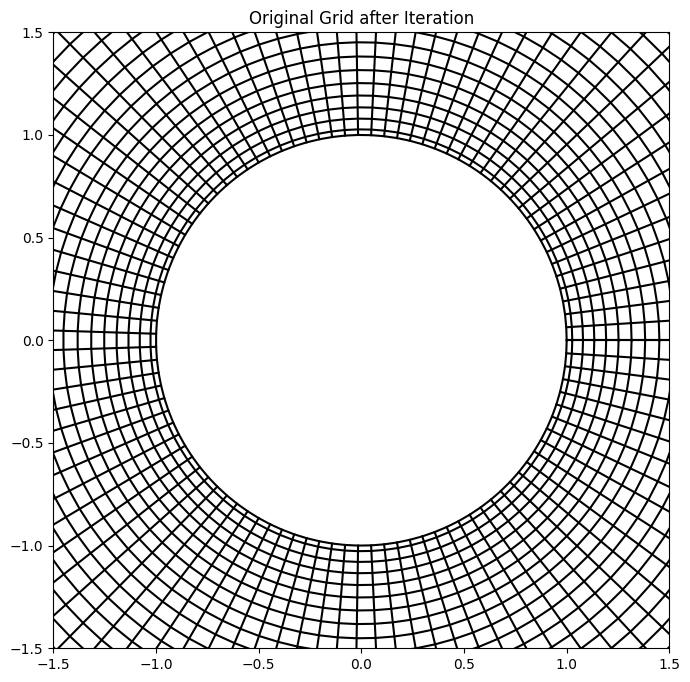

In [59]:
plt.figure(figsize=(8, 8))
for i in range(n_xi):
    plt.plot(x[i, :], y[i, :], 'k')
for j in range(n_eta):
    plt.plot(x[:, j], y[:, j], 'k')
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Original Grid after Iteration')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.savefig(f'Circle_source_ds_{ds}_detailed.png')
plt.show()

## Airfoil

### Original Mesh

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the mesh
R_inner = 0.75  # Not used directly in the new approach
R_outer = 7.5  # Outer circle radius
n_xi = 100     # Mesh points in angular direction
n_eta = 25     # Mesh points in radial direction
epsilon = 1e-4   # Convergence criterion

def airfoil_shifted(x):
    # Shift x values to the left by 0.5
    x_shifted = x + 0.5
    # Coefficients of the polynomial in the equation
    c = [0.298222773, -0.127125232, -0.357907906, 0.291984971, -0.105174606]
    # Compute polynomial value with shifted x
    poly = c[0]*np.sqrt(np.maximum(x_shifted, 0)) + c[1]*x_shifted + c[2]*x_shifted**2 + c[3]*x_shifted**3 + c[4]*x_shifted**4
    # Scale factor for the equation
    scale = 0.594689181
    return scale * poly

# We will use a non-uniform distribution for the x-values to densify the mesh at the ends and sparsify it in the middle
# Create a cosine distribution to cluster more points at the ends
num = np.int(n_xi/2)
x_mesh_values = -0.5 + 0.5 * (1 + np.cos(np.linspace(0, np.pi, num)))

# Calculate y values for the non-uniform mesh
y_upper_mesh = airfoil_shifted(x_mesh_values)
y_lower_mesh = -airfoil_shifted(x_mesh_values)

# 创建xi和eta的网格点
xi = np.linspace(0, 2*np.pi, n_xi)
eta = np.linspace(0, 1, n_eta)

# 初始化x和y的网格
x = np.zeros((n_xi, n_eta+1))
y = np.zeros((n_xi, n_eta+1))

# 使用初始网格生成
for i in range(n_xi):
    for j in range(1,n_eta+1):
        r = R_inner + (R_outer - R_inner) * (eta[j-1])
        x[i, j] = r * np.cos(xi[i])
        y[i, j] = r * np.sin(xi[i])

for i in range(num):
    x[i,0]=x_mesh_values[i]
    y[i,0]=y_upper_mesh[i]
    x[n_xi-i-1,0]=x_mesh_values[i]
    y[n_xi-i-1,0]=y_lower_mesh[i]


C:\Users\carrot\AppData\Local\Temp\ipykernel_23788\2131265501.py:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  num = np.int(n_xi/2)


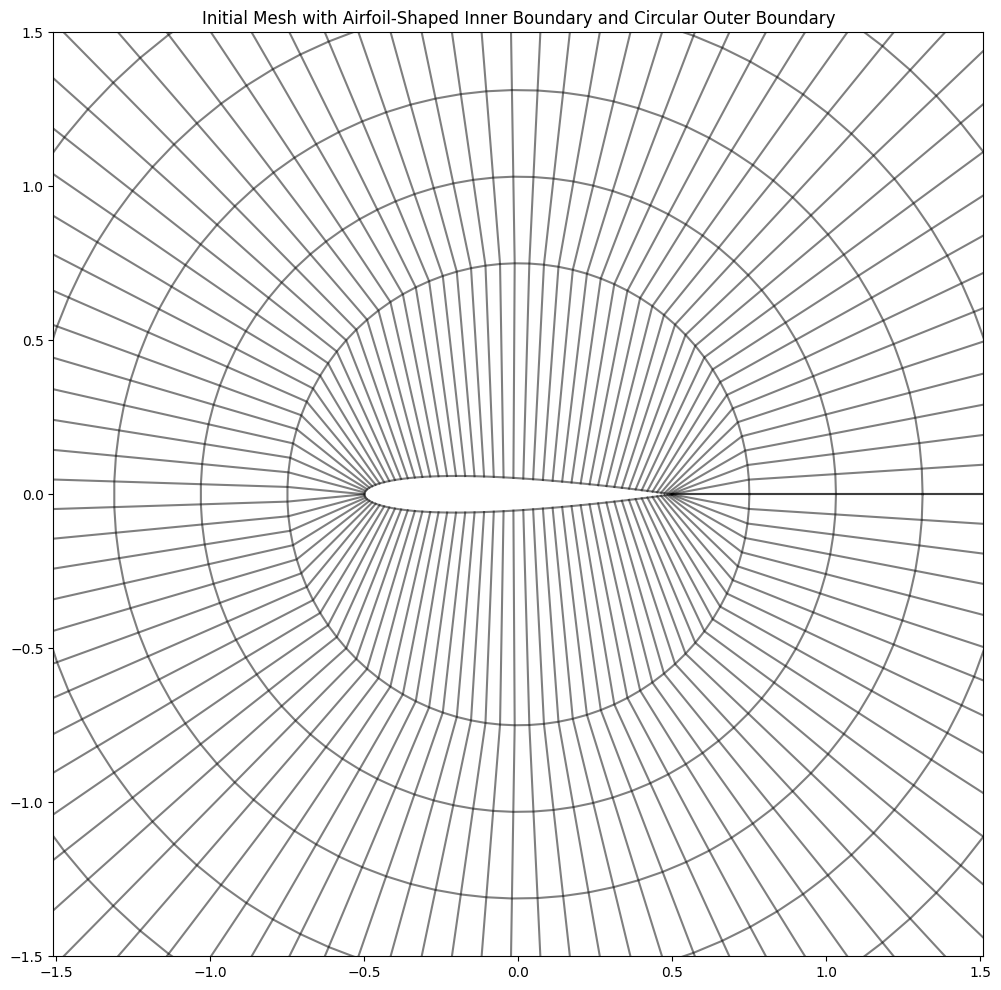

In [23]:
# Plot the mesh
plt.figure(figsize=(12, 12))

plt.plot(x, y, 'k', alpha=0.5)  # Grid lines in the radial direction
plt.plot(x.T, y.T, 'k', alpha=0.5)  # Grid lines in the circular direction
plt.title('Initial Mesh with Airfoil-Shaped Inner Boundary and Circular Outer Boundary')
plt.axis('equal')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.savefig('Airfoil_initial_mesh.png')
plt.show()

### Set 1

In [24]:
# 设置迭代次数
max_iterations = 2000

for iteration in range(max_iterations):  # 最大迭代次数
    x_new = x.copy()
    y_new = y.copy()
    
    for i in range(1, n_xi):
        for j in range(1, n_eta):
            # 处理周期边界条件
            ip1 = (i + 1) % (n_xi-1)
            im1 = (i - 1) % (n_xi-1)
            
            # 计算中心差分导数
            x_xi = (x[ip1, j] - x[im1, j]) / 2
            x_eta = (x[i, j+1] - x[i, j-1]) / 2
            y_xi = (y[ip1, j] - y[im1, j]) / 2
            y_eta = (y[i, j+1] - y[i, j-1]) / 2

            # 计算α, β, γ
            alpha = x_eta**2 + y_eta**2           
            beta = x_xi * x_eta + y_xi * y_eta
            gamma = x_xi**2 + y_xi**2
            
            # 计算中心差分的交叉项
            x_cross = (x[ip1, j+1] - x[ip1, j-1] - x[im1, j+1] + x[im1, j-1]) / 2
            y_cross = (y[ip1, j+1] - y[ip1, j-1] - y[im1, j+1] + y[im1, j-1]) / 2

            # 计算系数
            b_w = b_e = alpha
            b_s = b_n = gamma
            b_p = b_w + b_e + b_s + b_n
            c_px = - beta * x_cross
            c_py = - beta * y_cross

            # 更新x和y的值
            x_new[i, j] = (b_w*x[im1, j] + b_e*x[ip1, j] + b_s*x[i, j-1] + b_n*x[i, j+1] + c_px) / b_p
            y_new[i, j] = (b_w*y[im1, j] + b_e*y[ip1, j] + b_s*y[i, j-1] + b_n*y[i, j+1] + c_py) / b_p
    x_new[0, :] = x_new[-1, :]  # 周期边界条件
    y_new[0, :] = y_new[-1, :]  # 周期边界条件
    
    # 检查收敛条件
    max_change = max(np.max(np.abs(x_new - x)), np.max(np.abs(y_new - y)))
    print(max_change)
    if max_change < epsilon:
        print(f'Convergence achieved after {iteration+1} iterations.')
        break

    # 更新网格
    x, y = x_new, y_new

0.004463897258021987
0.004459277846378562
0.004454633264587393
0.004449964691969122
0.004445273256448168
0.004440560037036967
0.004435826066240267
0.004431864270654451
0.004428130202627223
0.004424367841076915
0.004420550383946953
0.004416633388339974
0.004412562465507364
0.004408282525417029
0.004403743572129137
0.00439890407542709
0.004393732263636707
0.004388206115396365
0.004382312578233183
0.004376046411216805
0.004369408900985583
0.004362406601487123
0.004355050178105557
0.004347353392939901
0.00433933224121219
0.004331044750201407
0.004323790293349283
0.004316328036801487
0.004308664732601386
0.004300808061720396
0.004292766395637138
0.004284548592371706
0.004276163823705659
0.0042676214312233895
0.004258930806842365
0.004250101296065623
0.004241142119173702
0.004232062309935891
0.004222870666454881
0.0042135757157169
0.004204185685263262
0.004194708486202181
0.0041851516989099835
0.004175522569096479
0.0041658280024288175
0.004156074569809931
0.0041462685071289584
0.00413641572

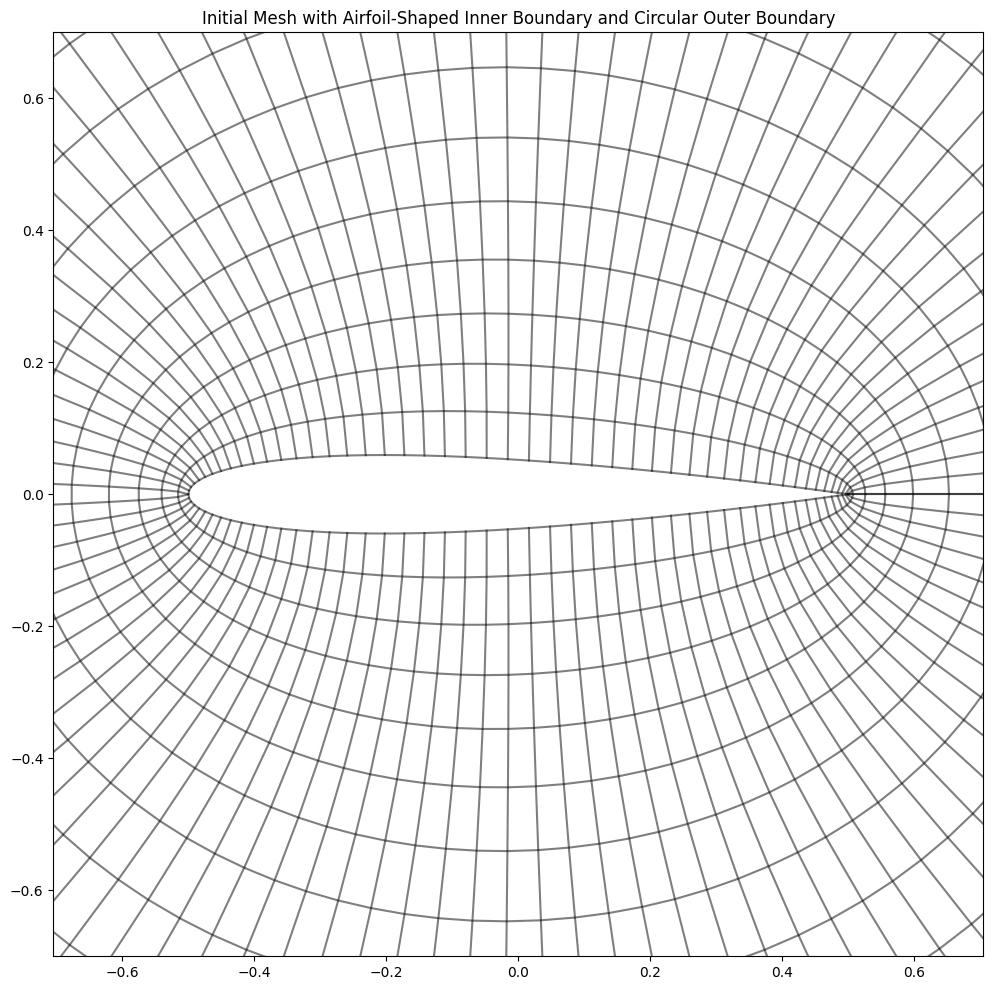

In [25]:
plt.figure(figsize=(12, 12))

plt.plot(x, y, 'k', alpha=0.5)  # Grid lines in the radial direction
plt.plot(x.T, y.T, 'k', alpha=0.5)  # Grid lines in the circular direction
plt.title('Initial Mesh with Airfoil-Shaped Inner Boundary and Circular Outer Boundary')
plt.axis('equal')
plt.xlim(-.7, .7)
plt.ylim(-.7, .7)
plt.savefig('Airfoil_without_source.png')
plt.show()

### Set 2 

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the mesh
R_inner = 0.75  # Not used directly in the new approach
R_outer = 7.5  # Outer circle radius
n_xi = 100     # Mesh points in angular direction
n_eta = 25     # Mesh points in radial direction
epsilon = 1e-4   # Convergence criterion

def airfoil_shifted(x):
    # Shift x values to the left by 0.5
    x_shifted = x + 0.5
    # Coefficients of the polynomial in the equation
    c = [0.298222773, -0.127125232, -0.357907906, 0.291984971, -0.105174606]
    # Compute polynomial value with shifted x
    poly = c[0]*np.sqrt(np.maximum(x_shifted, 0)) + c[1]*x_shifted + c[2]*x_shifted**2 + c[3]*x_shifted**3 + c[4]*x_shifted**4
    # Scale factor for the equation
    scale = 0.594689181
    return scale * poly

# We will use a non-uniform distribution for the x-values to densify the mesh at the ends and sparsify it in the middle
# Create a cosine distribution to cluster more points at the ends
num = np.int(n_xi/2)
x_mesh_values = -0.5 + 0.5 * (1 + np.cos(np.linspace(0, np.pi, num)))

# Calculate y values for the non-uniform mesh
y_upper_mesh = airfoil_shifted(x_mesh_values)
y_lower_mesh = -airfoil_shifted(x_mesh_values)

# 创建xi和eta的网格点
xi = np.linspace(0, 2*np.pi, n_xi)
eta = np.linspace(0, 1, n_eta)

# 初始化x和y的网格
x = np.zeros((n_xi, n_eta+1))
y = np.zeros((n_xi, n_eta+1))

# 使用初始网格生成
for i in range(n_xi):
    for j in range(1,n_eta+1):
        r = R_inner + (R_outer - R_inner) * (eta[j-1])
        x[i, j] = r * np.cos(xi[i])
        y[i, j] = r * np.sin(xi[i])

for i in range(num):
    x[i,0]=x_mesh_values[i]
    y[i,0]=y_upper_mesh[i]
    x[n_xi-i-1,0]=x_mesh_values[i]
    y[n_xi-i-1,0]=y_lower_mesh[i]



C:\Users\carrot\AppData\Local\Temp\ipykernel_23788\1763300399.py:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  num = np.int(n_xi/2)


In [27]:
ds = 0.005  # 设置网格间距

P1_real = 0
Q1_real = 0
wp = 0.1
wq = 0.1
a = 20
b = 20

# 设置迭代次数
max_iterations = 500


for iteration in range(max_iterations):  # 最大迭代次数
    x_new = x.copy()
    y_new = y.copy()
    
    for i in range(1, n_xi):
        
        for j in range(0, n_eta):
            ip2 = (i + 2) % (n_xi-1)
            ip1 = (i + 1) % (n_xi-1)
            im1 = (i - 1) % (n_xi-1)
            im2 = (i - 2 + n_xi - 1) % (n_xi-1) 
            if(j == 0):
                # print('calculate P, Q')
                x_xi = (x[ip1, j] - x[im1, j]) / 2
                y_xi = (y[ip1, j] - y[im1, j]) / 2
                x_xi_plus = (x[ip2, j] - x[i, j]) / 2
                x_xi_minus = (x[i, j] - x[im2, j]) / 2
                y_xi_plus = (y[ip2, j] - y[i, j]) / 2
                y_xi_minus = (y[i, j] - y[im2, j]) / 2
                
                x_eta = ds*y_xi/(x_xi**2+y_xi**2)**0.5
                y_eta = -ds*x_xi/(x_xi**2+y_xi**2)**0.5
                
                x_eta_plus = ds*y_xi_plus/(x_xi_plus**2+y_xi_plus**2)**0.5
                y_eta_plus = -ds*x_xi_plus/(x_xi_plus**2+y_xi_plus**2)**0.5
                
                x_eta_minus = ds*y_xi_minus/(x_xi_minus**2+y_xi_minus**2)**0.5
                y_eta_minus = -ds*x_xi_minus/(x_xi_minus**2+y_xi_minus**2)**0.5
                
                x_xi_xi = x[ip1, j] - 2*x[i, j] + x[im1, j]
                x_eta_eta = 0.5*(-7*x[i, j-1] + 8*x[i, j] - x[i, j+1])-3*x_eta
                y_xi_xi = y[ip1, j] - 2*y[i, j] + y[im1, j]
                y_eta_eta = 0.5*(-7*y[i, j-1] + 8*y[i, j] - y[i, j+1])-3*y_eta
                
                alpha = x_eta**2 + y_eta**2
                beta = x_xi * x_eta + y_xi * y_eta
                gamma = x_xi**2 + y_xi**2
                
                x_xi_eta = (x_eta_plus - x_eta_minus)/2
                y_xi_eta = (y_eta_plus - y_eta_minus)/2
                
                J = x_xi*y_eta - x_eta*y_xi
                
                R1 = -J**-2*(alpha*x_xi_xi - 2*beta*x_xi_eta + gamma*x_eta_eta)
                R2 = -J**-2*(alpha*y_xi_xi - 2*beta*y_xi_eta + gamma*y_eta_eta)
                P1 = J**-1*(y_eta*R1 - x_eta*R2)
                Q1 = J**-1*(- y_xi*R1 + x_xi*R2)
                # if(P1_real == 0):
                #     P1_real = P1
                #     Q1_real = Q1
                # else:
                #     P1_real = P1_real + wp*(P1 - P1_real)
                #     Q1_real = Q1_real + wq*(Q1 - Q1_real)
                P1_real = P1_real + wp*(P1 - P1_real)
                Q1_real = Q1_real + wq*(Q1 - Q1_real)                         
            else:
                # 计算中心差分导数
                x_xi = (x[ip1, j] - x[im1, j]) / 2
                x_eta = (x[i, j+1] - x[i, j-1]) / 2
                y_xi = (y[ip1, j] - y[im1, j]) / 2
                y_eta = (y[i, j+1] - y[i, j-1]) / 2
                
                J = x_xi*y_eta - x_eta*y_xi
                
                # 计算α, β, γ
                alpha = x_eta**2 + y_eta**2           
                beta = x_xi * x_eta + y_xi * y_eta
                gamma = x_xi**2 + y_xi**2
                
                #g
                g11 = gamma
                g12 = beta
                g22 = alpha        
                    
                # 计算中心差分的交叉项
                x_cross = (x[ip1, j+1] - x[ip1, j-1] - x[im1, j+1] + x[im1, j-1]) / 2
                y_cross = (y[ip1, j+1] - y[ip1, j-1] - y[im1, j+1] + y[im1, j-1]) / 2

                # 计算系数
                b_w = b_e = alpha
                b_s = b_n = gamma
                b_p = b_w + b_e + b_s + b_n
                c_px = - beta * x_cross
                c_py = - beta * y_cross
                appendix_x = -J**2*(P1_real*np.exp(-a*j)*x_xi + Q1_real*np.exp(-a*j)*x_eta)
                appendix_y = -J**2*(P1_real*np.exp(-b*j)*y_xi + Q1_real*np.exp(-b*j)*y_eta)
                
                
                x_new[i, j] = (b_w*x[im1, j] + b_e*x[ip1, j] + b_s*x[i, j-1] + b_n*x[i, j+1] + c_px + appendix_x) / b_p
                y_new[i, j] = (b_w*y[im1, j] + b_e*y[ip1, j] + b_s*y[i, j-1] + b_n*y[i, j+1] + c_py + appendix_y) / b_p
                      
    x_new[0, :] = x_new[-1, :]  # 周期边界条件
    y_new[0, :] = y_new[-1, :]  # 周期边界条件
    
    # 检查收敛条件
    max_change = max(np.max(np.abs(x_new - x)), np.max(np.abs(y_new - y)))
    print(max_change)
    if max_change < epsilon:
        print(f'Convergence achieved after {iteration+1} iterations.')
        break
    # if max_change > 10 :
    #     print(f'Failed to converge after {iteration+1} iterations.')
    #     break
    # # 更新网格
    x, y = x_new, y_new

0.004463897258021987
0.004459277846378562
0.004454633264587393
0.004449964691969122
0.004445273256448168
0.004440560037036967
0.004435826066240267
0.004431864270654451
0.004428130202627223
0.004424367841076915
0.004420550383946953
0.004416633388339974
0.004412562465507364
0.004408282525417029
0.0044037435721300255
0.00439890407542709
0.004393732263637595
0.004388206115397253
0.004382312578242953
0.0043760464112336805
0.004369408901051308
0.004362406601597257
0.0043550501784253015
0.004347353393415965
0.004339332242388139
0.0043310447593380985
0.0043237903048094495
0.004316328059531749
0.004308664759775205
0.004300808112070342
0.004292766453586339
0.0042845486939491195
0.0042761639370940685
0.004267621621057316
0.0042589310134939495
0.00425010162891315
0.004241142474033843
0.004232062862933539
0.004222871245803006
0.004213576593159907
0.004204186590992975
0.004194709824266951
0.004185153062742586
0.004175524540341868
0.004165829989883463
0.00415607738726731
0.004146271321135764
0.004136

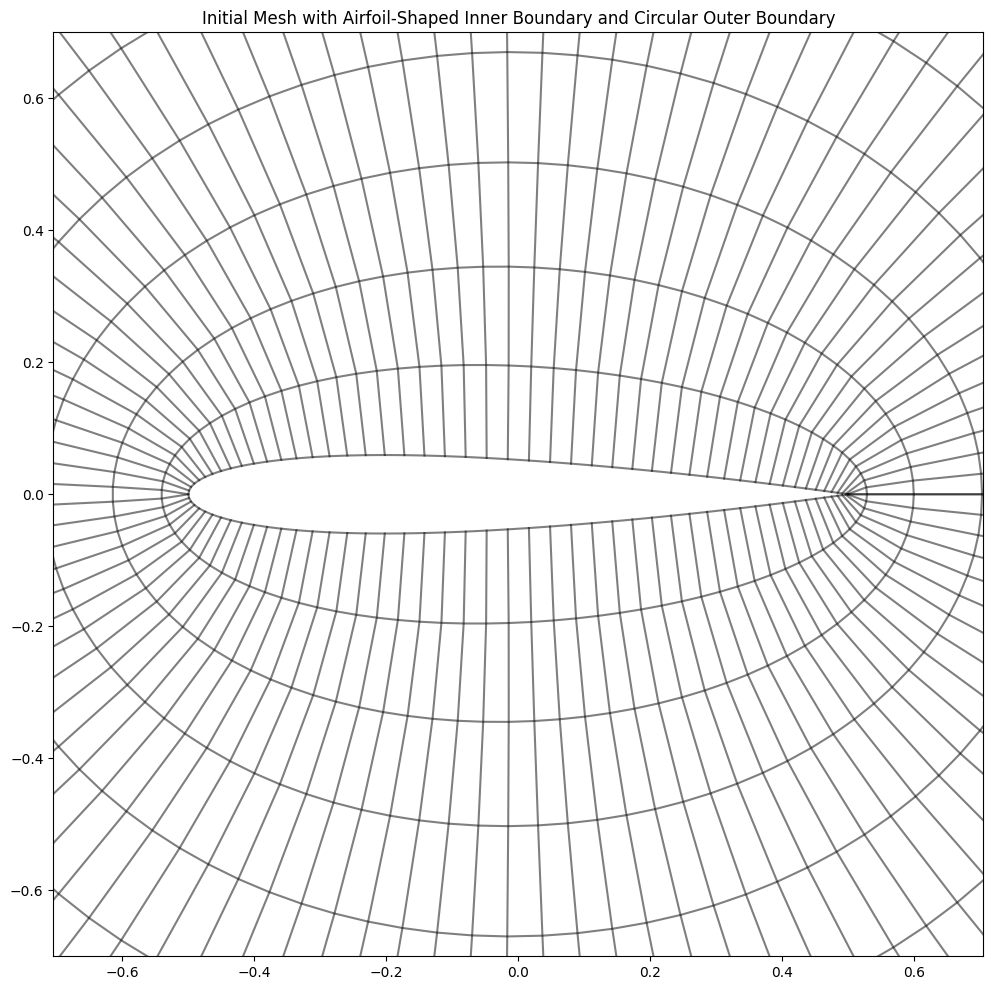

In [28]:
# Plot the mesh
plt.figure(figsize=(12, 12))

plt.plot(x, y, 'k', alpha=0.5)  # Grid lines in the radial direction
plt.plot(x.T, y.T, 'k', alpha=0.5)  # Grid lines in the circular direction
plt.title('Initial Mesh with Airfoil-Shaped Inner Boundary and Circular Outer Boundary')
plt.axis('equal')
plt.xlim(-.7, .7)
plt.ylim(-.7, .7)
plt.savefig(f'Airfoil_with_source_ds_{ds}.png')
plt.show()

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the mesh
R_inner = 0.75  # Not used directly in the new approach
R_outer = 7.5  # Outer circle radius
n_xi = 100     # Mesh points in angular direction
n_eta = 25     # Mesh points in radial direction
epsilon = 1e-4   # Convergence criterion

def airfoil_shifted(x):
    # Shift x values to the left by 0.5
    x_shifted = x + 0.5
    # Coefficients of the polynomial in the equation
    c = [0.298222773, -0.127125232, -0.357907906, 0.291984971, -0.105174606]
    # Compute polynomial value with shifted x
    poly = c[0]*np.sqrt(np.maximum(x_shifted, 0)) + c[1]*x_shifted + c[2]*x_shifted**2 + c[3]*x_shifted**3 + c[4]*x_shifted**4
    # Scale factor for the equation
    scale = 0.594689181
    return scale * poly

# We will use a non-uniform distribution for the x-values to densify the mesh at the ends and sparsify it in the middle
# Create a cosine distribution to cluster more points at the ends
num = np.int(n_xi/2)
x_mesh_values = -0.5 + 0.5 * (1 + np.cos(np.linspace(0, np.pi, num)))

# Calculate y values for the non-uniform mesh
y_upper_mesh = airfoil_shifted(x_mesh_values)
y_lower_mesh = -airfoil_shifted(x_mesh_values)

# 创建xi和eta的网格点
xi = np.linspace(0, 2*np.pi, n_xi)
eta = np.linspace(0, 1, n_eta)

# 初始化x和y的网格
x = np.zeros((n_xi, n_eta+1))
y = np.zeros((n_xi, n_eta+1))

# 使用初始网格生成
for i in range(n_xi):
    for j in range(1,n_eta+1):
        r = R_inner + (R_outer - R_inner) * (eta[j-1])
        x[i, j] = r * np.cos(xi[i])
        y[i, j] = r * np.sin(xi[i])

for i in range(num):
    x[i,0]=x_mesh_values[i]
    y[i,0]=y_upper_mesh[i]
    x[n_xi-i-1,0]=x_mesh_values[i]
    y[n_xi-i-1,0]=y_lower_mesh[i]



C:\Users\carrot\AppData\Local\Temp\ipykernel_23788\1763300399.py:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  num = np.int(n_xi/2)


In [44]:
ds = 0.0005  # 设置网格间距

P1_real = 0
Q1_real = 0
wp = 0.2
wq = 0.2
a = 20
b = 20

# 设置迭代次数
max_iterations = 1000


for iteration in range(max_iterations):  # 最大迭代次数
    x_new = x.copy()
    y_new = y.copy()
    
    for i in range(1, n_xi):
        
        for j in range(0, n_eta):
            ip2 = (i + 2) % (n_xi-1)
            ip1 = (i + 1) % (n_xi-1)
            im1 = (i - 1) % (n_xi-1)
            im2 = (i - 2 + n_xi - 1) % (n_xi-1) 
            if(j == 0):
                # print('calculate P, Q')
                x_xi = (x[ip1, j] - x[im1, j]) / 2
                y_xi = (y[ip1, j] - y[im1, j]) / 2
                x_xi_plus = (x[ip2, j] - x[i, j]) / 2
                x_xi_minus = (x[i, j] - x[im2, j]) / 2
                y_xi_plus = (y[ip2, j] - y[i, j]) / 2
                y_xi_minus = (y[i, j] - y[im2, j]) / 2
                
                x_eta = ds*y_xi/(x_xi**2+y_xi**2)**0.5
                y_eta = -ds*x_xi/(x_xi**2+y_xi**2)**0.5
                
                x_eta_plus = ds*y_xi_plus/(x_xi_plus**2+y_xi_plus**2)**0.5
                y_eta_plus = -ds*x_xi_plus/(x_xi_plus**2+y_xi_plus**2)**0.5
                
                x_eta_minus = ds*y_xi_minus/(x_xi_minus**2+y_xi_minus**2)**0.5
                y_eta_minus = -ds*x_xi_minus/(x_xi_minus**2+y_xi_minus**2)**0.5
                
                x_xi_xi = x[ip1, j] - 2*x[i, j] + x[im1, j]
                x_eta_eta = 0.5*(-7*x[i, j-1] + 8*x[i, j] - x[i, j+1])-3*x_eta
                y_xi_xi = y[ip1, j] - 2*y[i, j] + y[im1, j]
                y_eta_eta = 0.5*(-7*y[i, j-1] + 8*y[i, j] - y[i, j+1])-3*y_eta
                
                alpha = x_eta**2 + y_eta**2
                beta = x_xi * x_eta + y_xi * y_eta
                gamma = x_xi**2 + y_xi**2
                
                x_xi_eta = (x_eta_plus - x_eta_minus)/2
                y_xi_eta = (y_eta_plus - y_eta_minus)/2
                
                J = x_xi*y_eta - x_eta*y_xi
                
                R1 = -J**-2*(alpha*x_xi_xi - 2*beta*x_xi_eta + gamma*x_eta_eta)
                R2 = -J**-2*(alpha*y_xi_xi - 2*beta*y_xi_eta + gamma*y_eta_eta)
                P1 = J**-1*(y_eta*R1 - x_eta*R2)
                Q1 = J**-1*(- y_xi*R1 + x_xi*R2)
                # if(P1_real == 0):
                #     P1_real = P1
                #     Q1_real = Q1
                # else:
                #     P1_real = P1_real + wp*(P1 - P1_real)
                #     Q1_real = Q1_real + wq*(Q1 - Q1_real)
                P1_real = P1_real + wp*(P1 - P1_real)
                Q1_real = Q1_real + wq*(Q1 - Q1_real)                         
            else:
                # 计算中心差分导数
                x_xi = (x[ip1, j] - x[im1, j]) / 2
                x_eta = (x[i, j+1] - x[i, j-1]) / 2
                y_xi = (y[ip1, j] - y[im1, j]) / 2
                y_eta = (y[i, j+1] - y[i, j-1]) / 2
                
                J = x_xi*y_eta - x_eta*y_xi
                
                # 计算α, β, γ
                alpha = x_eta**2 + y_eta**2           
                beta = x_xi * x_eta + y_xi * y_eta
                gamma = x_xi**2 + y_xi**2
                
                #g
                g11 = gamma
                g12 = beta
                g22 = alpha        
                    
                # 计算中心差分的交叉项
                x_cross = (x[ip1, j+1] - x[ip1, j-1] - x[im1, j+1] + x[im1, j-1]) / 2
                y_cross = (y[ip1, j+1] - y[ip1, j-1] - y[im1, j+1] + y[im1, j-1]) / 2

                # 计算系数
                b_w = b_e = alpha
                b_s = b_n = gamma
                b_p = b_w + b_e + b_s + b_n
                c_px = - beta * x_cross
                c_py = - beta * y_cross
                appendix_x = -J**2*(P1_real*np.exp(-a*j)*x_xi + Q1_real*np.exp(-a*j)*x_eta)
                appendix_y = -J**2*(P1_real*np.exp(-b*j)*y_xi + Q1_real*np.exp(-b*j)*y_eta)
                
                
                x_new[i, j] = (b_w*x[im1, j] + b_e*x[ip1, j] + b_s*x[i, j-1] + b_n*x[i, j+1] + c_px + appendix_x) / b_p
                y_new[i, j] = (b_w*y[im1, j] + b_e*y[ip1, j] + b_s*y[i, j-1] + b_n*y[i, j+1] + c_py + appendix_y) / b_p
                      
    x_new[0, :] = x_new[-1, :]  # 周期边界条件
    y_new[0, :] = y_new[-1, :]  # 周期边界条件
    
    # 检查收敛条件
    max_change = max(np.max(np.abs(x_new - x)), np.max(np.abs(y_new - y)))
    print(max_change)
    if max_change < epsilon:
        print(f'Convergence achieved after {iteration+1} iterations.')
        break
    # if max_change > 10 :
    #     print(f'Failed to converge after {iteration+1} iterations.')
    #     break
    # # 更新网格
    x, y = x_new, y_new

0.05118156117576167
0.00825548397587305
0.007400108083737714
0.005887719570753597
0.0046284816529301165
0.003664047329210343
0.002957124778444231
0.0024419882058278747
0.0020579638601355976
0.0019009422080505378
0.001772986943750332
0.0016489092338040634
0.0015270344931276325
0.0014199792430104607
0.0013187681778338567
0.0012300841284761943
0.0011484265253709214
0.0010758794262440696
0.0010099318823415804
0.0009502877560902678
0.0008964873954207531
0.0008469244576891355
0.0008025041218931994
0.0007716704533943797
0.0007484308027339293
0.0007248908726252834
0.0007031487181262674
0.000680903315677106
0.0006608540507536953
0.0006400962920697362
0.0006217471521343665
0.0006025064517303225
0.0005857740598729233
0.000567997412667165
0.0005527594264629343
0.0005365155475564598
0.0005224773816170925
0.000507626955732976
0.0004946886724594979
0.00048109030508708406
0.00046915957892029736
0.00045668310238294874
0.00044567098481151923
0.0004341988021678844
0.0004254623297182958
0.0004186820695369

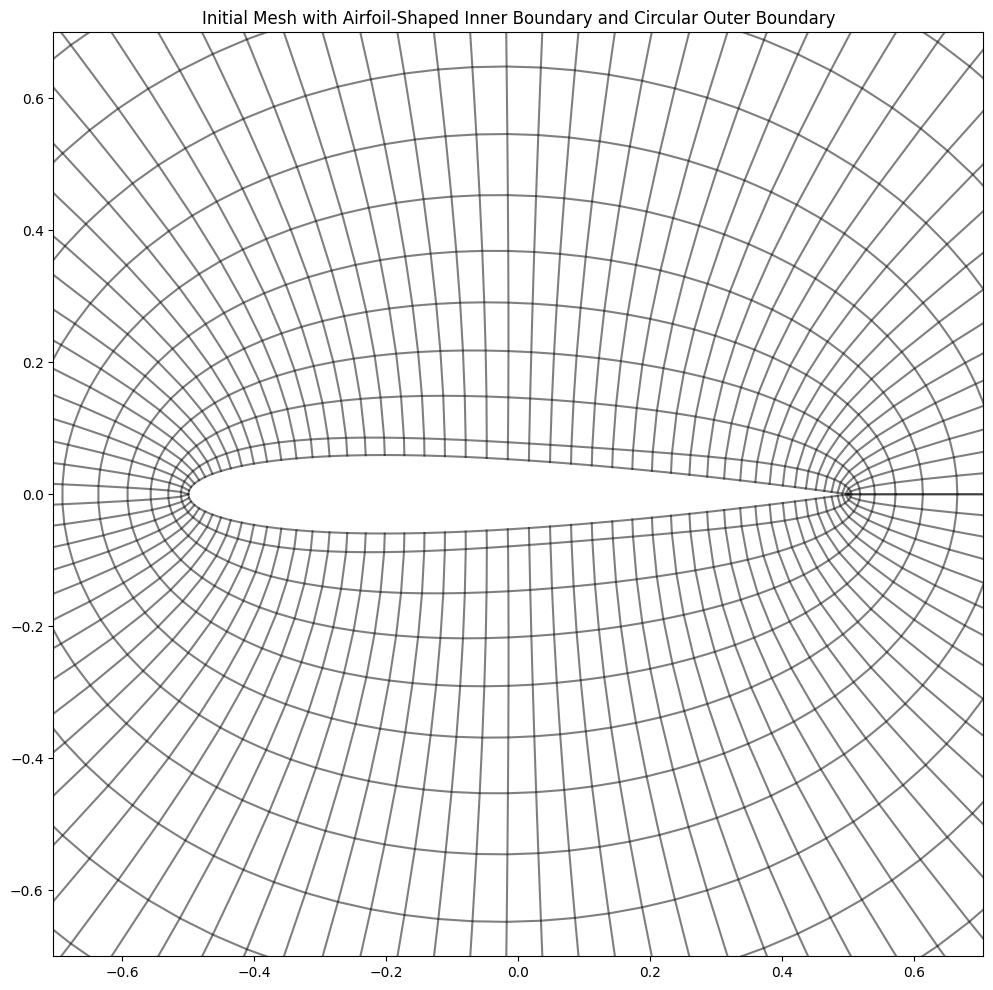

In [45]:
# Plot the mesh
plt.figure(figsize=(12, 12))

plt.plot(x, y, 'k', alpha=0.5)  # Grid lines in the radial direction
plt.plot(x.T, y.T, 'k', alpha=0.5)  # Grid lines in the circular direction
plt.title('Initial Mesh with Airfoil-Shaped Inner Boundary and Circular Outer Boundary')
plt.axis('equal')
plt.xlim(-.7, .7)
plt.ylim(-.7, .7)
plt.savefig(f'Airfoil_with_source_ds_{ds}.png')
plt.show()

# Appendix(no use)


C:\Users\carrot\AppData\Local\Temp\ipykernel_20932\4262895067.py:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  num = np.int(n_xi/2)


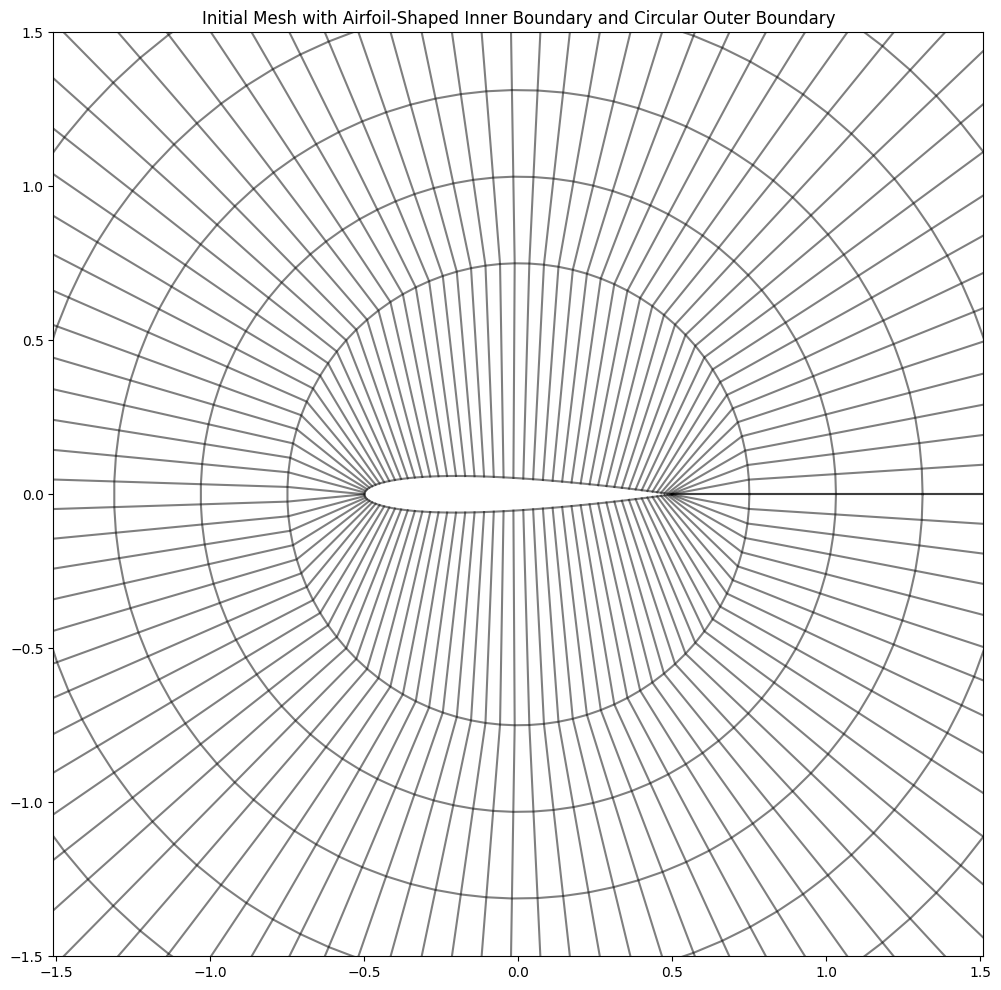

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the mesh
R_inner = 0.75  # Not used directly in the new approach
R_outer = 7.5  # Outer circle radius
n_xi = 100     # Mesh points in angular direction
n_eta = 25     # Mesh points in radial direction
epsilon = 1e-4   # Convergence criterion

def airfoil_shifted(x):
    # Shift x values to the left by 0.5
    x_shifted = x + 0.5
    # Coefficients of the polynomial in the equation
    c = [0.298222773, -0.127125232, -0.357907906, 0.291984971, -0.105174606]
    # Compute polynomial value with shifted x
    poly = c[0]*np.sqrt(np.maximum(x_shifted, 0)) + c[1]*x_shifted + c[2]*x_shifted**2 + c[3]*x_shifted**3 + c[4]*x_shifted**4
    # Scale factor for the equation
    scale = 0.594689181
    return scale * poly

# We will use a non-uniform distribution for the x-values to densify the mesh at the ends and sparsify it in the middle
# Create a cosine distribution to cluster more points at the ends
num = np.int(n_xi/2)
x_mesh_values = -0.5 + 0.5 * (1 + np.cos(np.linspace(0, np.pi, num)))

# Calculate y values for the non-uniform mesh
y_upper_mesh = airfoil_shifted(x_mesh_values)
y_lower_mesh = -airfoil_shifted(x_mesh_values)

# 创建xi和eta的网格点
xi = np.linspace(0, 2*np.pi, n_xi)
eta = np.linspace(0, 1, n_eta)

# 初始化x和y的网格
x = np.zeros((n_xi, n_eta+1))
y = np.zeros((n_xi, n_eta+1))

# 使用初始网格生成
for i in range(n_xi):
    for j in range(1,n_eta+1):
        r = R_inner + (R_outer - R_inner) * (eta[j-1])
        x[i, j] = r * np.cos(xi[i])
        y[i, j] = r * np.sin(xi[i])

for i in range(num):
    x[i,0]=x_mesh_values[i]
    y[i,0]=y_upper_mesh[i]
    x[n_xi-i-1,0]=x_mesh_values[i]
    y[n_xi-i-1,0]=y_lower_mesh[i]


# Plot the mesh
plt.figure(figsize=(12, 12))

plt.plot(x, y, 'k', alpha=0.5)  # Grid lines in the radial direction
plt.plot(x.T, y.T, 'k', alpha=0.5)  # Grid lines in the circular direction
plt.title('Initial Mesh with Airfoil-Shaped Inner Boundary and Circular Outer Boundary')
plt.axis('equal')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()


In [84]:
# # With Source
# # 更改法向间距

# def adjusted_sigmoid(x):
#     return 2 / (1 + np.exp(-x)) - 1

# # 设置迭代次数
# max_iterations = 500

# L_intend = 0.01

# Q_sum = 0

# epsilon = 1e-5

for iteration in range(max_iterations):  # 最大迭代次数
    x_new = x.copy()
    y_new = y.copy()
    
    for i in range(1, n_xi):
        for j in range(1, n_eta):
            # 处理周期边界条件
            ip1 = (i + 1) % (n_xi-1)
            im1 = (i - 1) % (n_xi-1)
            
            # 计算中心差分导数
            x_xi = (x[ip1, j] - x[im1, j]) / 2
            x_eta = (x[i, j+1] - x[i, j-1]) / 2
            y_xi = (y[ip1, j] - y[im1, j]) / 2
            y_eta = (y[i, j+1] - y[i, j-1]) / 2

            #计算源项
            
            # 计算α, β, γ
            alpha = x_eta**2 + y_eta**2           
            beta = x_xi * x_eta + y_xi * y_eta
            gamma = x_xi**2 + y_xi**2
            
            # 计算中心差分的交叉项
            x_cross = (x[ip1, j+1] - x[ip1, j-1] - x[im1, j+1] + x[im1, j-1]) / 2
            y_cross = (y[ip1, j+1] - y[ip1, j-1] - y[im1, j+1] + y[im1, j-1]) / 2

            # 计算系数
            b_w = b_e = alpha
            b_s = b_n = gamma
            b_p = b_w + b_e + b_s + b_n
            c_px = - beta * x_cross
            c_py = - beta * y_cross
                            
            # 更新x和y的值
            x_new[i, j] = (b_w*x[im1, j] + b_e*x[ip1, j] + b_s*x[i, j-1] + b_n*x[i, j+1] + c_px) / b_p
            y_new[i, j] = (b_w*y[im1, j] + b_e*y[ip1, j] + b_s*y[i, j-1] + b_n*y[i, j+1] + c_py) / b_p
    x_new[0, :] = x_new[-1, :]  # 周期边界条件
    y_new[0, :] = y_new[-1, :]  # 周期边界条件
    
    # 检查收敛条件
    max_change = max(np.max(np.abs(x_new - x)), np.max(np.abs(y_new - y)))
    print(max_change)
    if max_change < epsilon:
        print(f'Convergence achieved after {iteration+1} iterations.')
        break

    # 更新网格
    x, y = x_new, y_new

0.004463897258021987
0.004459277846378562
0.004454633264587393
0.004449964691969122
0.004445273256448168
0.004440560037036967
0.004435826066240267
0.004431864270654451
0.004428130202627223
0.004424367841076915


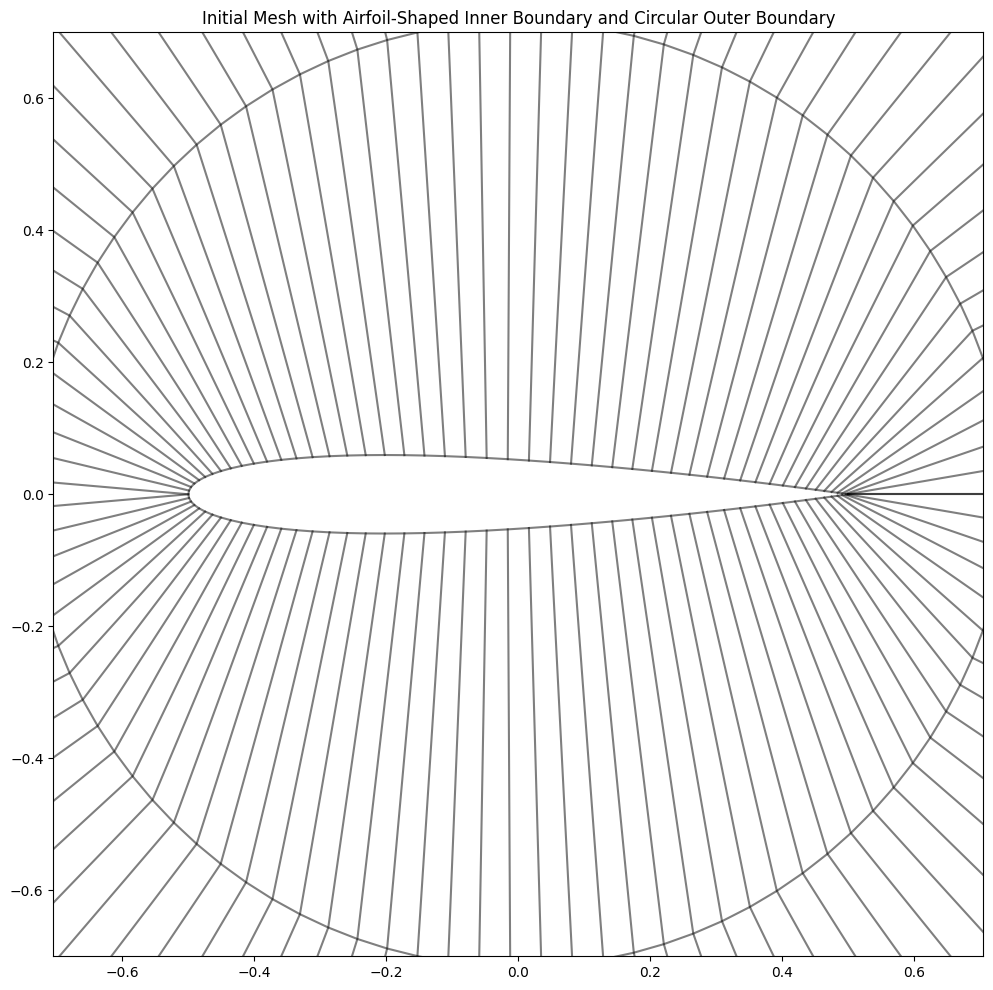

In [85]:
# Plot the mesh
plt.figure(figsize=(12, 12))

plt.plot(x, y, 'k', alpha=0.5)  # Grid lines in the radial direction
plt.plot(x.T, y.T, 'k', alpha=0.5)  # Grid lines in the circular direction
plt.title('Initial Mesh with Airfoil-Shaped Inner Boundary and Circular Outer Boundary')
plt.axis('equal')
plt.xlim(-.7, .7)
plt.ylim(-.7, .7)
plt.show()

In [91]:
ds = 0.00005  # 设置网格间距

P1_real = 0
Q1_real = 0
wp = 0.1
wq = 0.1
a = 20
b = 20

# 设置迭代次数
max_iterations = 200


for iteration in range(max_iterations):  # 最大迭代次数
    x_new = x.copy()
    y_new = y.copy()
    
    for i in range(1, n_xi):
        
        for j in range(0, n_eta):
            ip2 = (i + 2) % (n_xi-1)
            ip1 = (i + 1) % (n_xi-1)
            im1 = (i - 1) % (n_xi-1)
            im2 = (i - 2 + n_xi - 1) % (n_xi-1) 
            if(j == 0):
                # print('calculate P, Q')
                x_xi = (x[ip1, j] - x[im1, j]) / 2
                y_xi = (y[ip1, j] - y[im1, j]) / 2
                x_xi_plus = (x[ip2, j] - x[i, j]) / 2
                x_xi_minus = (x[i, j] - x[im2, j]) / 2
                y_xi_plus = (y[ip2, j] - y[i, j]) / 2
                y_xi_minus = (y[i, j] - y[im2, j]) / 2
                
                x_eta = ds*y_xi/(x_xi**2+y_xi**2)**0.5
                y_eta = -ds*x_xi/(x_xi**2+y_xi**2)**0.5
                
                x_eta_plus = ds*y_xi_plus/(x_xi_plus**2+y_xi_plus**2)**0.5
                y_eta_plus = -ds*x_xi_plus/(x_xi_plus**2+y_xi_plus**2)**0.5
                
                x_eta_minus = ds*y_xi_minus/(x_xi_minus**2+y_xi_minus**2)**0.5
                y_eta_minus = -ds*x_xi_minus/(x_xi_minus**2+y_xi_minus**2)**0.5
                
                x_xi_xi = x[ip1, j] - 2*x[i, j] + x[im1, j]
                x_eta_eta = 0.5*(-7*x[i, j-1] + 8*x[i, j] - x[i, j+1])-3*x_eta
                y_xi_xi = y[ip1, j] - 2*y[i, j] + y[im1, j]
                y_eta_eta = 0.5*(-7*y[i, j-1] + 8*y[i, j] - y[i, j+1])-3*y_eta
                
                alpha = x_eta**2 + y_eta**2
                beta = x_xi * x_eta + y_xi * y_eta
                gamma = x_xi**2 + y_xi**2
                
                x_xi_eta = (x_eta_plus - x_eta_minus)/2
                y_xi_eta = (y_eta_plus - y_eta_minus)/2
                
                J = x_xi*y_eta - x_eta*y_xi
                
                R1 = -J**-2*(alpha*x_xi_xi - 2*beta*x_xi_eta + gamma*x_eta_eta)
                R2 = -J**-2*(alpha*y_xi_xi - 2*beta*y_xi_eta + gamma*y_eta_eta)
                P1 = J**-1*(y_eta*R1 - x_eta*R2)
                Q1 = J**-1*(- y_xi*R1 + x_xi*R2)
                # if(P1_real == 0):
                #     P1_real = P1
                #     Q1_real = Q1
                # else:
                #     P1_real = P1_real + wp*(P1 - P1_real)
                #     Q1_real = Q1_real + wq*(Q1 - Q1_real)
                P1_real = P1_real + wp*(P1 - P1_real)
                Q1_real = Q1_real + wq*(Q1 - Q1_real)                         
            else:
                # 计算中心差分导数
                x_xi = (x[ip1, j] - x[im1, j]) / 2
                x_eta = (x[i, j+1] - x[i, j-1]) / 2
                y_xi = (y[ip1, j] - y[im1, j]) / 2
                y_eta = (y[i, j+1] - y[i, j-1]) / 2
                
                J = x_xi*y_eta - x_eta*y_xi
                
                # 计算α, β, γ
                alpha = x_eta**2 + y_eta**2           
                beta = x_xi * x_eta + y_xi * y_eta
                gamma = x_xi**2 + y_xi**2
                
                #g
                g11 = gamma
                g12 = beta
                g22 = alpha        
                    
                # 计算中心差分的交叉项
                x_cross = (x[ip1, j+1] - x[ip1, j-1] - x[im1, j+1] + x[im1, j-1]) / 2
                y_cross = (y[ip1, j+1] - y[ip1, j-1] - y[im1, j+1] + y[im1, j-1]) / 2

                # 计算系数
                b_w = b_e = alpha
                b_s = b_n = gamma
                b_p = b_w + b_e + b_s + b_n
                c_px = - beta * x_cross
                c_py = - beta * y_cross
                appendix_x = -J**2*(P1_real*np.exp(-a*j)*x_xi + Q1_real*np.exp(-a*j)*x_eta)
                appendix_y = -J**2*(P1_real*np.exp(-b*j)*y_xi + Q1_real*np.exp(-b*j)*y_eta)
                
                
                x_new[i, j] = (b_w*x[im1, j] + b_e*x[ip1, j] + b_s*x[i, j-1] + b_n*x[i, j+1] + c_px + appendix_x) / b_p
                y_new[i, j] = (b_w*y[im1, j] + b_e*y[ip1, j] + b_s*y[i, j-1] + b_n*y[i, j+1] + c_py + appendix_y) / b_p
                      
    x_new[0, :] = x_new[-1, :]  # 周期边界条件
    y_new[0, :] = y_new[-1, :]  # 周期边界条件
    
    # 检查收敛条件
    max_change = max(np.max(np.abs(x_new - x)), np.max(np.abs(y_new - y)))
    print(max_change)
    if max_change < epsilon:
        print(f'Convergence achieved after {iteration+1} iterations.')
        break
    # if max_change > 10 :
    #     print(f'Failed to converge after {iteration+1} iterations.')
    #     break
    # # 更新网格
    x, y = x_new, y_new

186.37387121941822
38897.24648210908
6921899.347596337
6536670638235.2
1.6210095007172304e+33
3.035282557647519e+115
nan
nan
nan
nan


C:\Users\carrot\AppData\Local\Temp\ipykernel_20932\42106108.py:95: RuntimeWarning: overflow encountered in double_scalars
  appendix_x = -J**2*(P1_real*np.exp(-a*j)*x_xi + Q1_real*np.exp(-a*j)*x_eta)
C:\Users\carrot\AppData\Local\Temp\ipykernel_20932\42106108.py:96: RuntimeWarning: overflow encountered in double_scalars
  appendix_y = -J**2*(P1_real*np.exp(-b*j)*y_xi + Q1_real*np.exp(-b*j)*y_eta)
C:\Users\carrot\AppData\Local\Temp\ipykernel_20932\42106108.py:93: RuntimeWarning: overflow encountered in double_scalars
  c_px = - beta * x_cross
C:\Users\carrot\AppData\Local\Temp\ipykernel_20932\42106108.py:94: RuntimeWarning: overflow encountered in double_scalars
  c_py = - beta * y_cross
C:\Users\carrot\AppData\Local\Temp\ipykernel_20932\42106108.py:99: RuntimeWarning: overflow encountered in double_scalars
  x_new[i, j] = (b_w*x[im1, j] + b_e*x[ip1, j] + b_s*x[i, j-1] + b_n*x[i, j+1] + c_px + appendix_x) / b_p
C:\Users\carrot\AppData\Local\Temp\ipykernel_20932\42106108.py:100: RuntimeW

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


KeyboardInterrupt: 

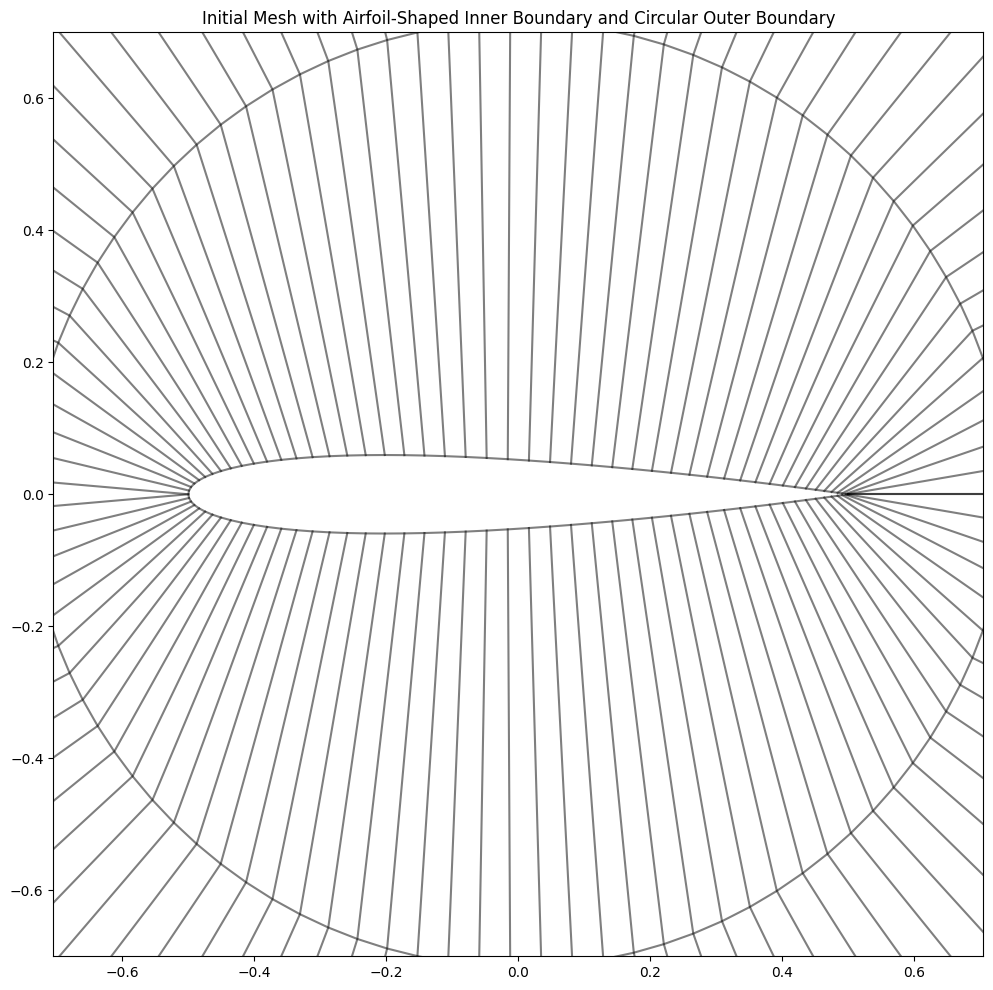

In [87]:
# Plot the mesh
plt.figure(figsize=(12, 12))

plt.plot(x, y, 'k', alpha=0.5)  # Grid lines in the radial direction
plt.plot(x.T, y.T, 'k', alpha=0.5)  # Grid lines in the circular direction
plt.title('Initial Mesh with Airfoil-Shaped Inner Boundary and Circular Outer Boundary')
plt.axis('equal')
plt.xlim(-.7, .7)
plt.ylim(-.7, .7)
plt.savefig(f'Question1/a{a}_b{b}_ds{ds}_wp{wp}_wq{wq}.png')
plt.show()

In [88]:
def sigmoid_modified(x):
    return 2 / (1 + np.exp(-0.1*x)) - 1
sigmoid_modified(5)

0.2449186624037092

In [89]:
# 设置迭代次数
max_iterations =10
we = 0.05
wq = 0.05
L_intend = 0.001
for iteration in range(max_iterations):  # 最大迭代次数
    x_new = x.copy()
    y_new = y.copy()
    
    for i in range(1, n_xi):
        
        
        for j in range(1, n_eta):
            # 处理周期边界条件
            ip1 = (i + 1) % (n_xi-1)
            im1 = (i - 1) % (n_xi-1)    
            
            # 计算中心差分导数
            x_xi = (x[ip1, j] - x[im1, j]) / 2
            x_eta = (x[i, j+1] - x[i, j-1]) / 2
            y_xi = (y[ip1, j] - y[im1, j]) / 2
            y_eta = (y[i, j+1] - y[i, j-1]) / 2

            # 计算二阶导数
            x_xi_xi = x[ip1, j] - 2*x[i, j] + x[im1, j]
            x_eta_eta = 0.5*(-7*x[i, j-1] + 8*x[i, j] - x[i, j+1])-3*x_eta
            y_xi_xi = y[ip1, j] - 2*y[i, j] + y[im1, j]
            y_eta_eta = 0.5*(-7*y[i, j-1] + 8*y[i, j] - y[i, j+1])-3*y_eta
            
            # x_eta_eta = x[i, j+1] - 2*x[i, j] + x[i, j-1]
            # y_eta_eta = y[i, j+1] - 2*y[i, j] + y[i, j-1]
            
            # 计算α, β, γ
            alpha = x_eta**2 + y_eta**2           
            beta = x_xi * x_eta + y_xi * y_eta
            gamma = x_xi**2 + y_xi**2
            
            # 计算中心差分的交叉项
            x_cross = (x[ip1, j+1] - x[ip1, j-1] - x[im1, j+1] + x[im1, j-1]) / 2
            y_cross = (y[ip1, j+1] - y[ip1, j-1] - y[im1, j+1] + y[im1, j-1]) / 2

            # 计算系数
            b_w = b_e = alpha
            b_s = b_n = gamma
            b_p = b_w + b_e + b_s + b_n
            c_px = - beta * x_cross
            c_py = - beta * y_cross
            
            
            if(j==1):
                L = np.sqrt((x[i, j]-x[i,j-1])**2+(y[i, j]-y[i,j-1])**2)
                ratio = (L-L_intend)/L_intend
                sigma = sigmoid_modified(ratio/2)
                b_s = b_s * (1 + sigma)
                b_n = b_n * (1 - sigma)
                x_new[i, j] = (b_w*x[im1, j] + b_e*x[ip1, j] + b_s*x[i, j-1] + b_n*x[i, j+1] + c_px) / b_p
                y_new[i, j] = (b_w*y[im1, j] + b_e*y[ip1, j] + b_s*y[i, j-1] + b_n*y[i, j+1] + c_py) / b_p
                

            else:
            # 更新x和y的值
                x_new[i, j] = (b_w*x[im1, j] + b_e*x[ip1, j] + b_s*x[i, j-1] + b_n*x[i, j+1] + c_px) / b_p
                y_new[i, j] = (b_w*y[im1, j] + b_e*y[ip1, j] + b_s*y[i, j-1] + b_n*y[i, j+1] + c_py) / b_p
                      
    x_new[0, :] = x_new[-1, :]  # 周期边界条件
    y_new[0, :] = y_new[-1, :]  # 周期边界条件
    
    # 检查收敛条件
    max_change = max(np.max(np.abs(x_new - x)), np.max(np.abs(y_new - y)))
    print(max_change)
    if max_change < epsilon:
        print(f'Convergence achieved after {iteration+1} iterations.')
        break
    if max_change > 1 :
        print(f'Failed to converge after {iteration+1} iterations.')
        break
    # 更新网格
    x, y = x_new, y_new

0.00863889540570395
0.00846048722656878
0.008304374707054696
0.008149659542580179
0.008013794276605202
0.007878488099716585
0.007756778134424214
0.007637626310643908
0.007526331638909589
0.007420523611456398


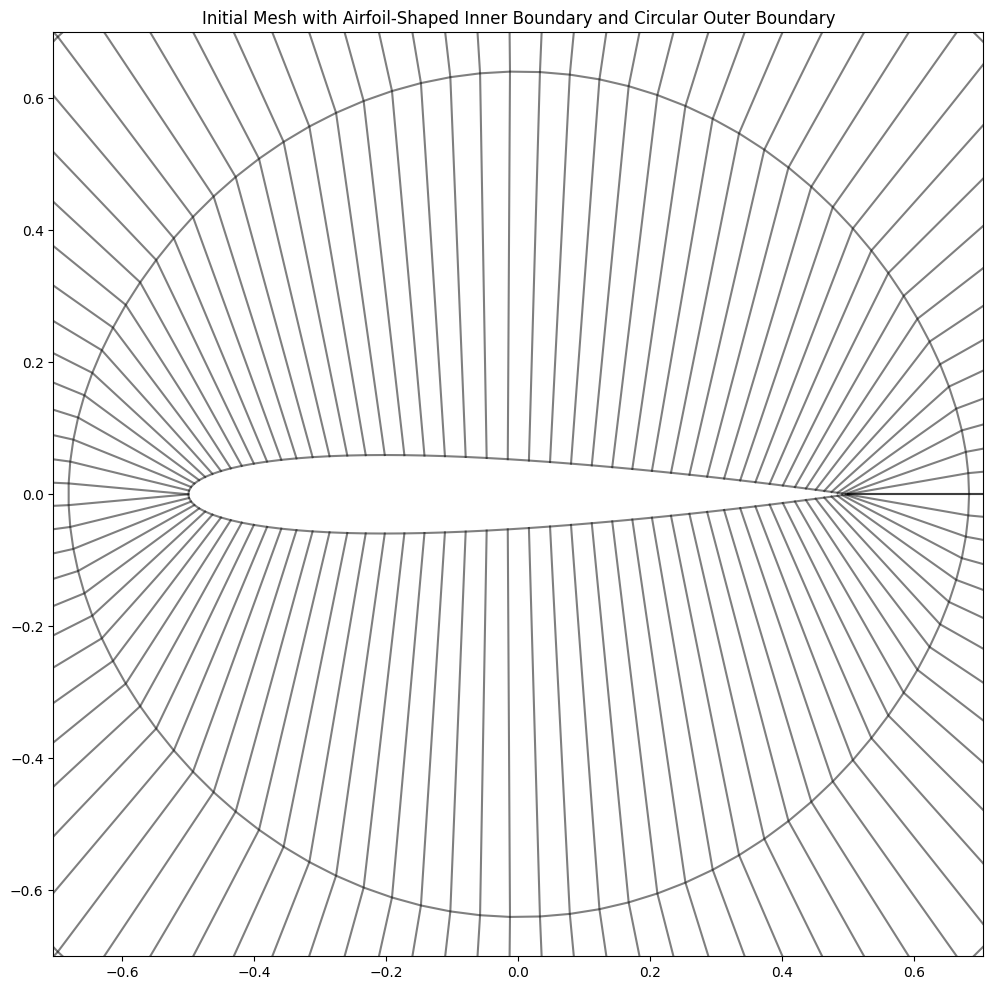

In [90]:
# Plot the mesh
plt.figure(figsize=(12, 12))

plt.plot(x, y, 'k', alpha=0.5)  # Grid lines in the radial direction
plt.plot(x.T, y.T, 'k', alpha=0.5)  # Grid lines in the circular direction
plt.title('Initial Mesh with Airfoil-Shaped Inner Boundary and Circular Outer Boundary')
plt.axis('equal')
plt.xlim(-.7, .7)
plt.ylim(-.7, .7)
plt.show()